In [30]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
raw_data = sns.load_dataset('titanic')
raw_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [32]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [33]:
raw_data.who.value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [34]:
clean_data = raw_data.dropna(axis = 1, thresh=500)
clean_data['age'].fillna(clean_data['age'].mean(), inplace = True)
clean_data.dropna(inplace = True)
clean_data.reset_index(drop = True, inplace = True)
clean_data.drop(['embark_town', 'alive', 'sex', 'adult_male', 'pclass', 'alone'],
                axis=1, inplace=True)
clean_data

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,survived,age,sibsp,parch,fare,embarked,class,who
0,0,22.000000,1,0,7.2500,S,Third,man
1,1,38.000000,1,0,71.2833,C,First,woman
2,1,26.000000,0,0,7.9250,S,Third,woman
3,1,35.000000,1,0,53.1000,S,First,woman
4,0,35.000000,0,0,8.0500,S,Third,man
...,...,...,...,...,...,...,...,...
884,0,27.000000,0,0,13.0000,S,Second,man
885,1,19.000000,0,0,30.0000,S,First,woman
886,0,29.699118,1,2,23.4500,S,Third,woman
887,1,26.000000,0,0,30.0000,C,First,man


In [35]:
target = clean_data[['survived']]
dummie_data = pd.get_dummies(clean_data[['embarked', 'class', 'who']], columns = ['embarked', 'class', 'who'])
dummie_data.drop(['embarked_S', 'class_First', 'who_child'], axis=1, inplace=True)
dummie_data

,embarked_C,embarked_Q,class_Second,class_Third,who_man,who_woman
0,0,0,0,1,1,0
1,1,0,0,0,0,1
2,0,0,0,1,0,1
3,0,0,0,0,0,1
4,0,0,0,1,1,0
...,...,...,...,...,...,...
884,0,0,1,0,1,0
885,0,0,0,0,0,1
886,0,0,0,1,0,1
887,1,0,0,0,1,0


In [36]:
from sklearn.preprocessing import StandardScaler # 표준정규분포/ 표준화 작업 -> 비례적으로 값을 표준화한다
scaler = StandardScaler()
scaled_data = clean_data[['age', 'sibsp', 'parch', 'fare']]
scaled_data = scaler.fit_transform(scaled_data)
scaled_data = pd.DataFrame(scaled_data, columns = ['age', 'sibsp', 'parch', 'fare'])
scaled_data

,age,sibsp,parch,fare
0,-0.590495,0.431350,-0.474326,-0.500240
1,0.643971,0.431350,-0.474326,0.788947
2,-0.281878,-0.475199,-0.474326,-0.486650
3,0.412509,0.431350,-0.474326,0.422861
4,0.412509,-0.475199,-0.474326,-0.484133
...,...,...,...,...
884,-0.204724,-0.475199,-0.474326,-0.384475
885,-0.821957,-0.475199,-0.474326,-0.042213
886,0.003524,0.431350,2.006119,-0.174084
887,-0.281878,-0.475199,-0.474326,-0.042213


In [37]:
train_data = pd.concat([scaled_data, dummie_data], axis = 1)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           889 non-null    float64
 1   sibsp         889 non-null    float64
 2   parch         889 non-null    float64
 3   fare          889 non-null    float64
 4   embarked_C    889 non-null    uint8  
 5   embarked_Q    889 non-null    uint8  
 6   class_Second  889 non-null    uint8  
 7   class_Third   889 non-null    uint8  
 8   who_man       889 non-null    uint8  
 9   who_woman     889 non-null    uint8  
dtypes: float64(4), uint8(6)
memory usage: 33.1 KB


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    train_data, target, test_size = 0.2)
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('Y_train shape :', Y_train.shape)
print('Y_test shape :', Y_test.shape)

X_train shape : (711, 10)
X_test shape : (178, 10)
Y_train shape : (711, 1)
Y_test shape : (178, 1)


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [40]:
model = Sequential() # Sequential 클래스는 Neural Network의 각 층을 순서대로 쌓을 수 있도록 
model.add(Dense(128, input_dim = 10, activation = 'relu')) #Dense 클래스는 (완전 연결된) 하나의 뉴런층을 구현
model.add(Dropout(0.02))
model.add(Dense(256, activation = 'relu')) # 은닉층 (Hidden layer)의 활성화함수로 ReLU (Rectified Linear Unit)를 사용
model.add(Dropout(0.02))
model.add(Dense(512, activation = 'relu')) 
model.add(Dropout(0.02))
model.add(Dense(256, activation = 'relu')) 
model.add(Dropout(0.02))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               1408      
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 256)               33024     
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               131584    
                                                                 
 dropout_14 (Dropout)        (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 256)              

In [41]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy']) #mse: 에러의 제곱에 평균
fit_hist = model.fit(X_train, Y_train, batch_size=50, 
                     epochs=30, validation_split=0.2, verbose=1)

Epoch 1/30
12/12 [==============================] - 1s 22ms/step - loss: 0.2061 - accuracy: 0.6620 - val_loss: 0.1788 - val_accuracy: 0.7483
Epoch 2/30
12/12 [==============================] - 0s 7ms/step - loss: 0.1506 - accuracy: 0.8028 - val_loss: 0.1653 - val_accuracy: 0.7483
Epoch 3/30
12/12 [==============================] - 0s 6ms/step - loss: 0.1453 - accuracy: 0.8028 - val_loss: 0.1592 - val_accuracy: 0.7692
Epoch 4/30
12/12 [==============================] - 0s 6ms/step - loss: 0.1372 - accuracy: 0.8169 - val_loss: 0.1752 - val_accuracy: 0.7762
Epoch 5/30
12/12 [==============================] - 0s 6ms/step - loss: 0.1253 - accuracy: 0.8327 - val_loss: 0.1230 - val_accuracy: 0.8462
Epoch 6/30
12/12 [==============================] - 0s 6ms/step - loss: 0.1175 - accuracy: 0.8380 - val_loss: 0.1428 - val_accuracy: 0.7692
Epoch 7/30
12/12 [==============================] - 0s 6ms/step - loss: 0.1190 - accuracy: 0.8363 - val_loss: 0.1248 - val_accuracy: 0.8392
Epoch 8/30
12/12 [=

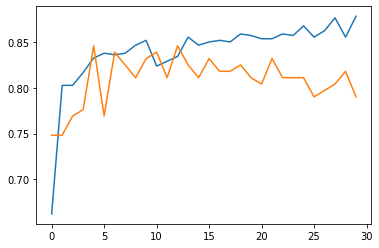

In [42]:
import matplotlib.pyplot as plt
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()

In [43]:
score = model.evaluate(X_test, Y_test, verbose = 0)
print('Keras DNN model loss :', score[0])
print('Keras DNN model accuracy :', score[1])

Keras DNN model loss : 0.1484440118074417
Keras DNN model accuracy : 0.7921348214149475


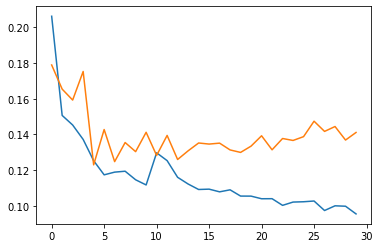

In [44]:
plt.plot(fit_hist.history['loss'])
plt.plot(fit_hist.history['val_loss'])
plt.show()